# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

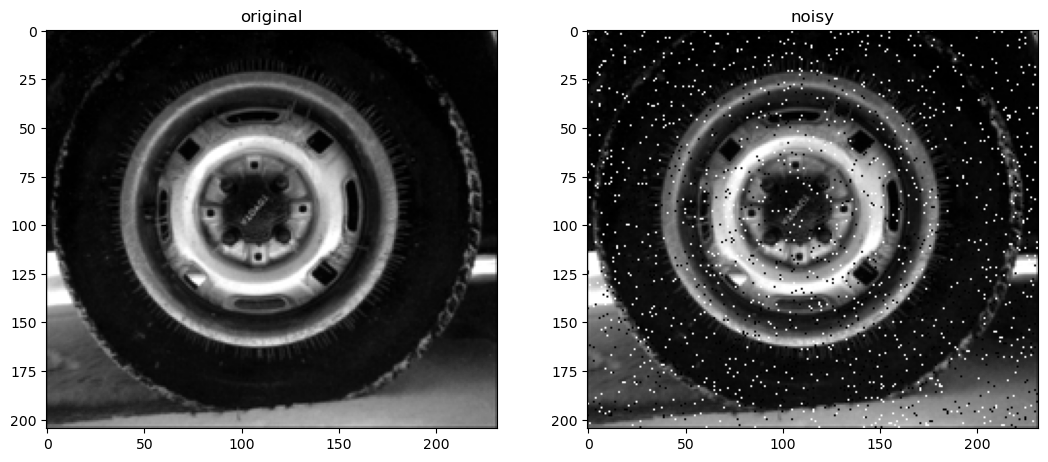

In [2]:
# Read the image and apply salt & pepper to it
img = io.imread("./tire.tif")
noisy_img = random_noise(img, mode="s&p", amount=0.05)
show_images([img, noisy_img], ["original", "noisy"])

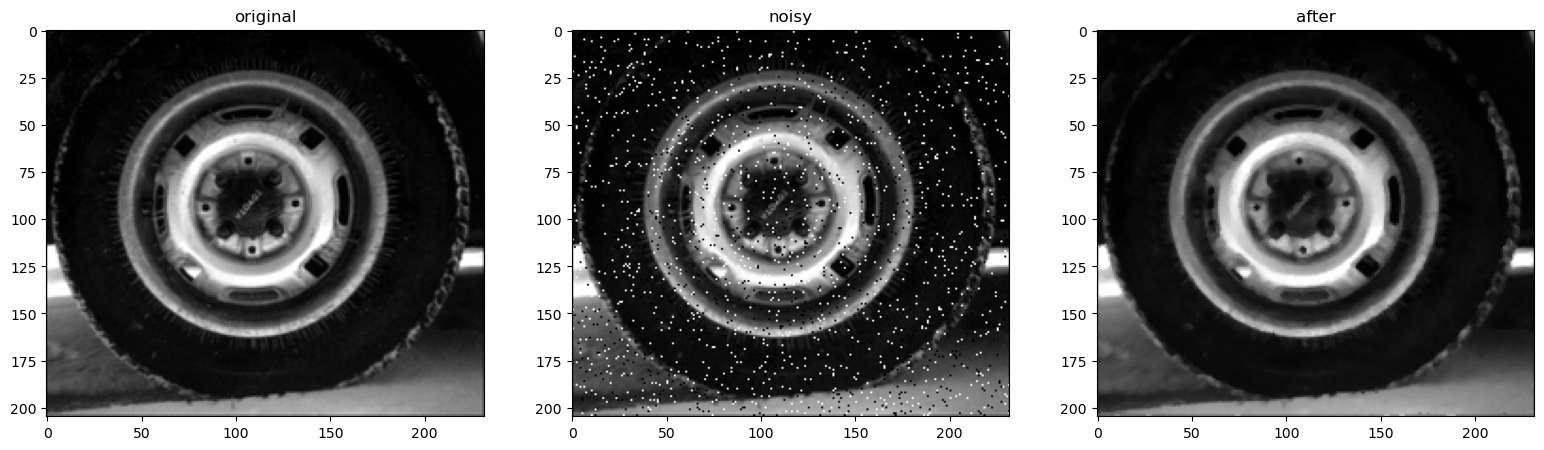

In [7]:
'''
(1) Your own median filter algorithm
'''
def myMedian(img, window):
	edgex = window[1] // 2
	edgey = window[0] // 2

	outputImage = np.zeros(img.shape)
	img = np.pad(img, pad_width=1, mode='edge')
	
	for x in range(edgex, img.shape[1] - edgex):
		for y in range(edgey, img.shape[0] - edgey):
			outputImage[y-1][x-1] = np.median(img[y-1:y+2, x-1:x+2])
	return outputImage

afterMyMedian = myMedian(noisy_img, (3,3))
show_images([img, noisy_img, afterMyMedian], ["original", "noisy", "after"])


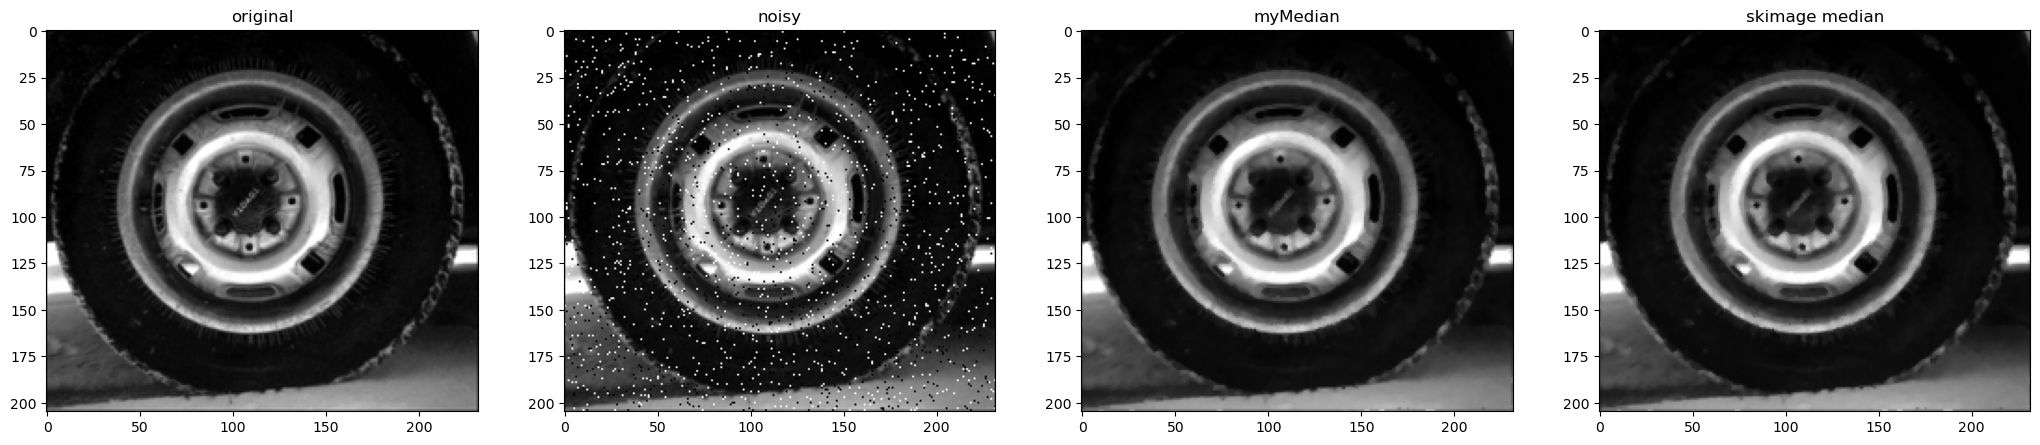

In [10]:
'''
(2) skimage median filter
'''
after = median(noisy_img)
# show_images([img, noisy_img, after], ["original", "noisy", "after"])
show_images([img, noisy_img, afterMyMedian, after], ["original", "noisy", "myMedian", "skimage median"])

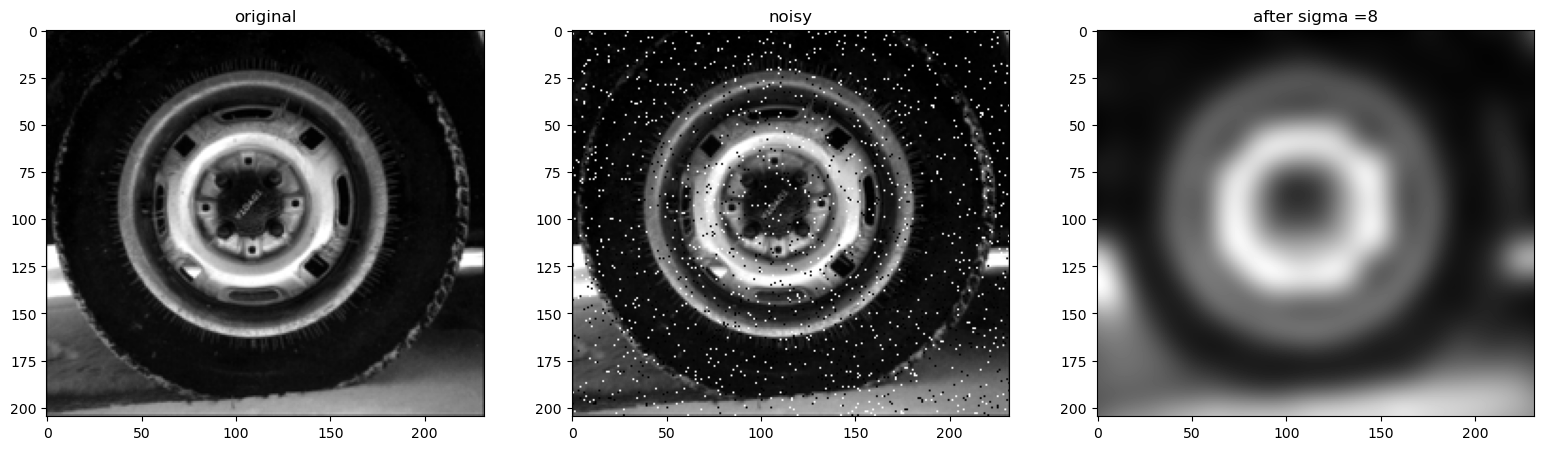

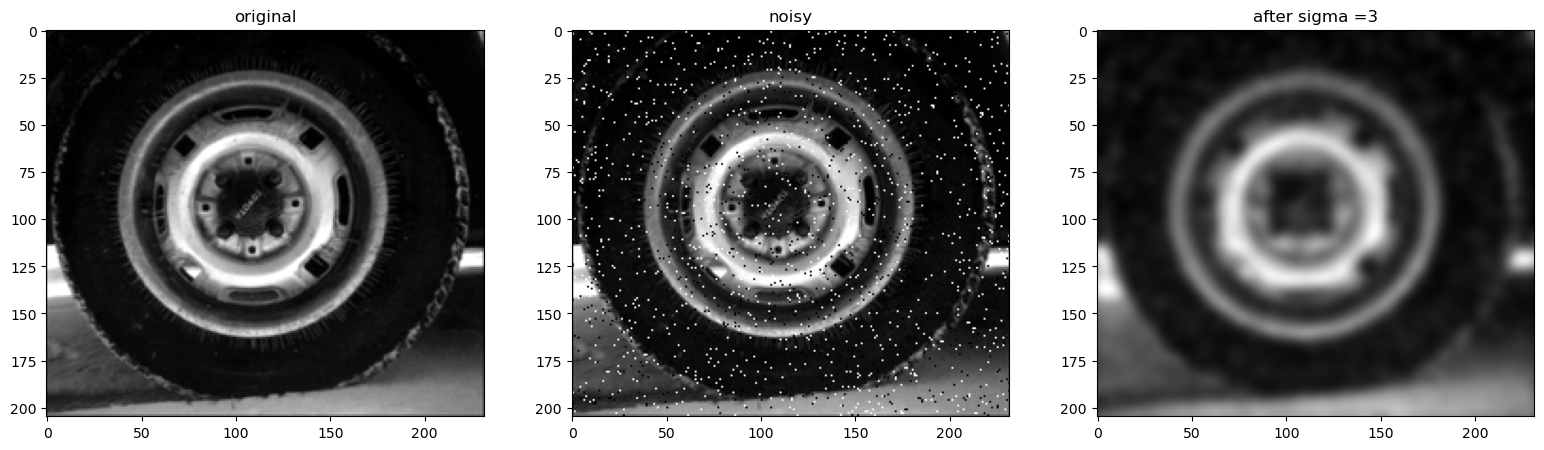

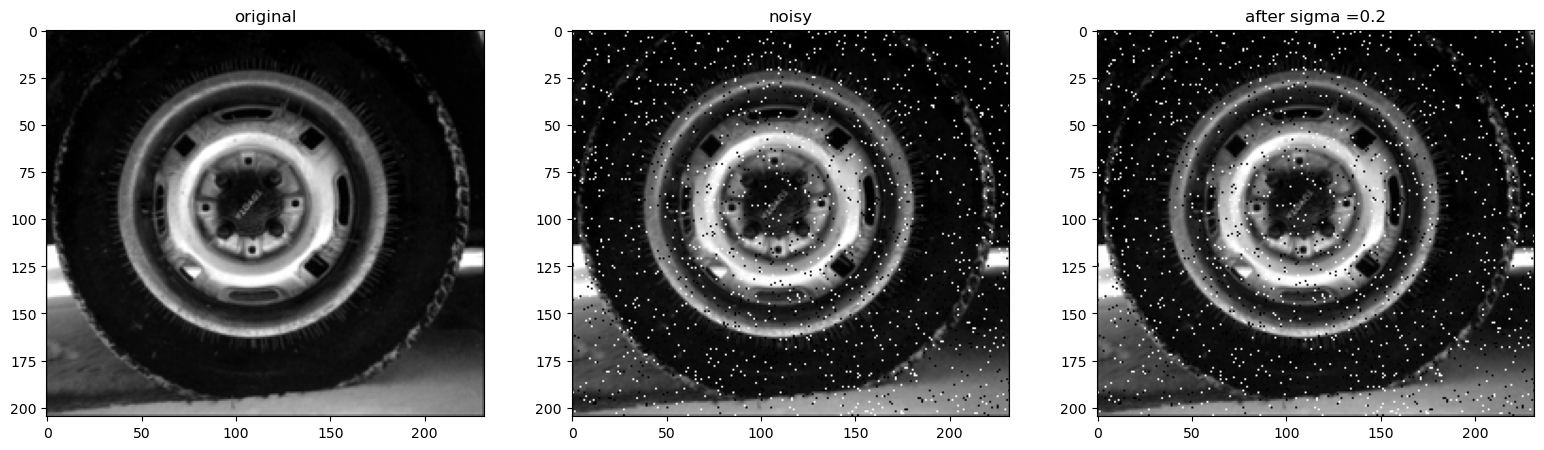

In [3]:
'''
(3) Gaussion Filters
'''
res = gaussian(noisy_img, sigma=8)
show_images([img, noisy_img, res], ["original", "noisy", "after sigma =8"])

res = gaussian(noisy_img, sigma=3)
show_images([img, noisy_img, res], ["original", "noisy", "after sigma =3"])

res = gaussian(noisy_img, sigma=0.2)
show_images([img, noisy_img, res], ["original", "noisy", "after sigma =0.2"])


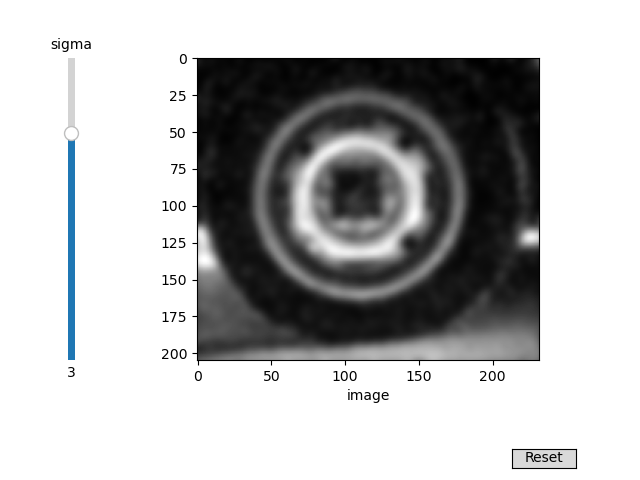

In [4]:

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
# The parametrized function to be plotted
def f(sigma):
    return gaussian(noisy_img,sigma=sigma)

# Define initial parameters
init_sigma = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
img = ax.imshow( f(init_sigma))
ax.set_xlabel('image')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)


# Make a vertically oriented slider to control the sigma
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
sigma_slider = Slider(
    ax=axamp,
    label="sigma",
    valmin=0,
    valmax=4,
    valinit=init_sigma,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line = ax.imshow( f(sigma_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
sigma_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    sigma_slider.reset()
button.on_clicked(reset)

plt.show()

sigma between 1 and 1.5 is quite good as we can still see some details